The following data details the number of fires in the Amazon Rainforest in Brazil, sorted by state and month, from 1997-2017. Climate change is an incredibly important topic and the destruction of the Amazon through deforestation and other means has been well-documented, and over half of the Amazon is located in Brazil. This data comes directly from Brazil's government, so it is as reliable of a source as exists regarding the topic. 

In [1]:
#Imports NumPy, Pandas, and Matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
#Creates a data frame, using the correct encoding (ansi) 

df = pd.read_csv('amazon.csv', encoding ='ansi')
%matplotlib inline

In [8]:
#This code prepares for the creation of graphs by creating data frames to iterate over

states = df['state'].unique()

m1 = df['month'] == 'Janeiro'
m2 = df['month'] == 'Fevereiro'
m3 = df['month'] == 'Março'
m4 = df['month'] == 'Abril'
m5 = df['month'] == 'Maio'
m6 = df['month'] == 'Junho'
m7 = df['month'] == 'Julho'
m8 = df['month'] == 'Agosto'
m9 = df['month'] == 'Setembro'
m10 = df['month'] == 'Outubro'
m11 = df['month'] == 'Novembro'
m12 = df['month'] == 'Dezembro'

q1 =  (m1 | m2 | m3)
q2 =  (m4 | m5 | m6)
q3 =  (m7 | m8 | m9)
q4 =  (m10 | m11 | m12)
quarters = (q1, q2, q3, q4)

C:\Users\relisoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


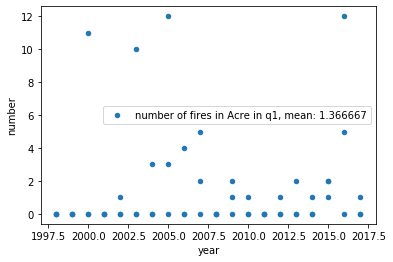

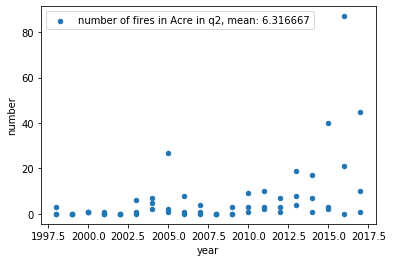

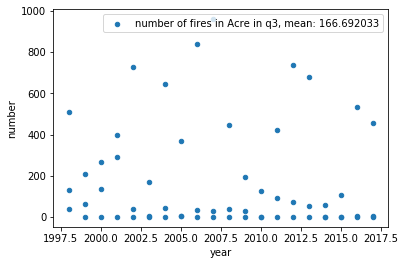

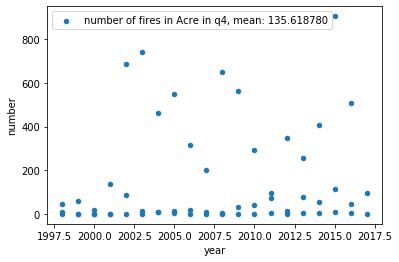

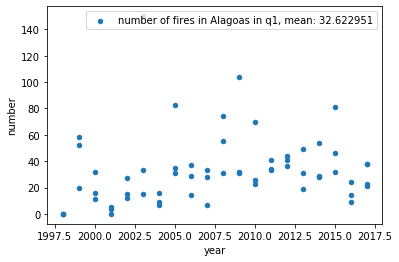

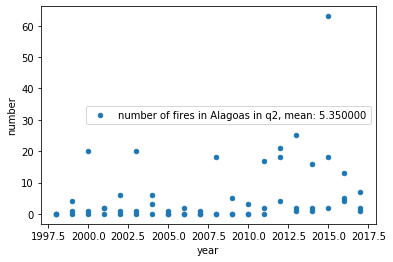

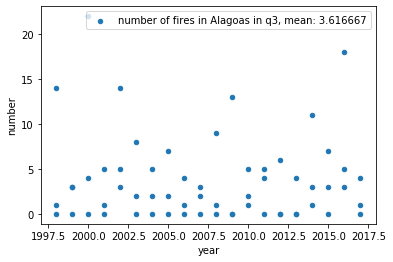

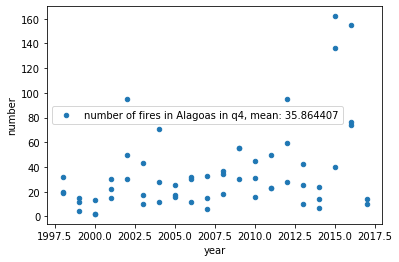

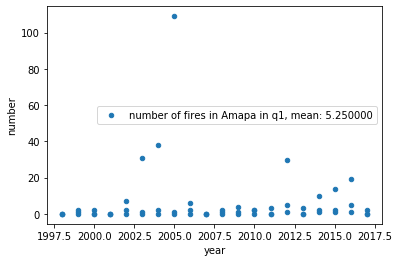

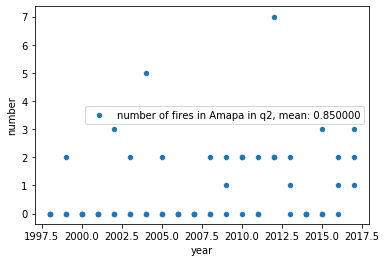

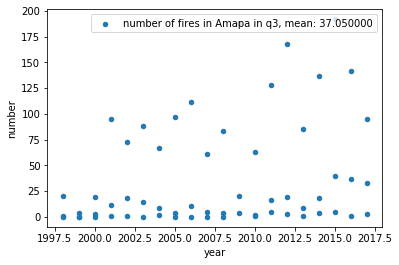

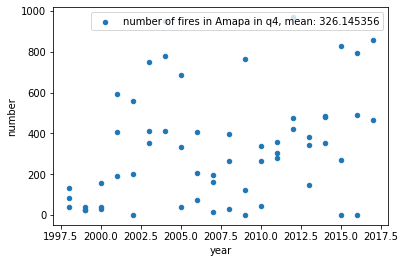

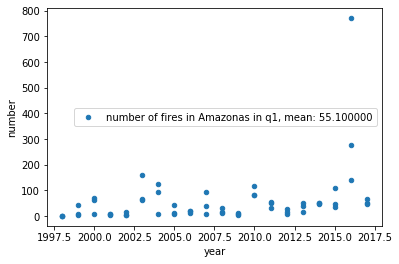

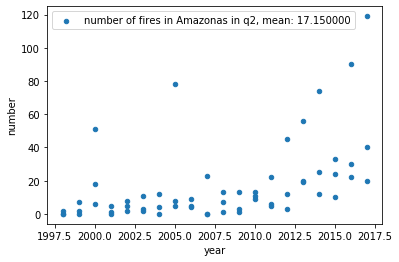

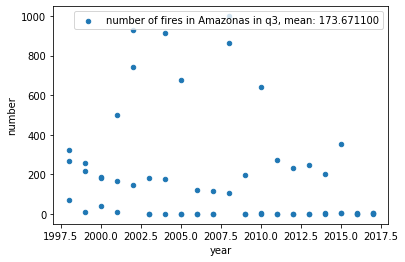

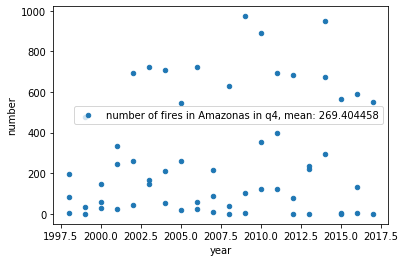

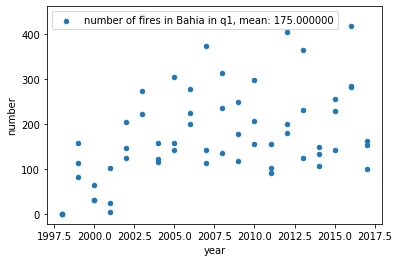

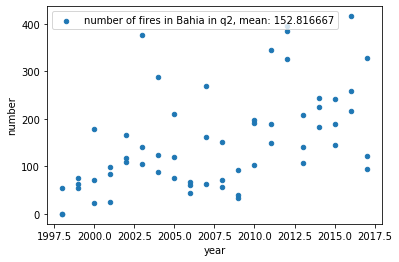

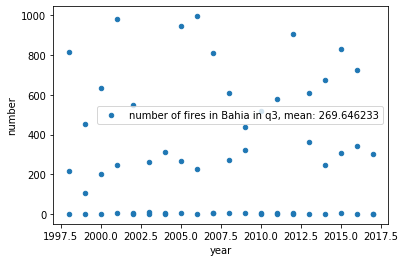

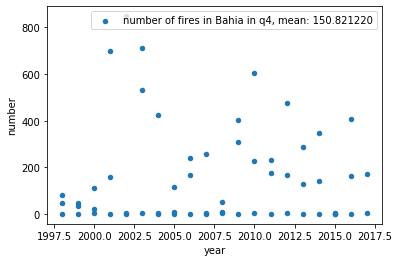

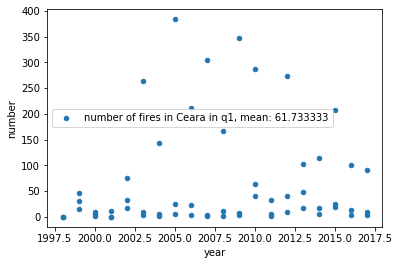

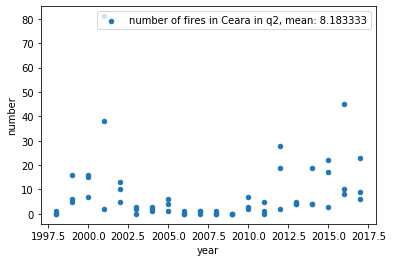

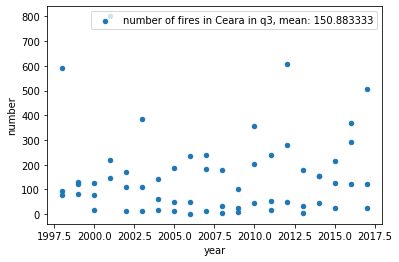

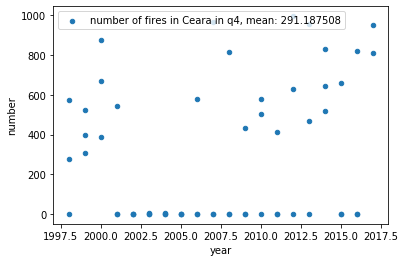

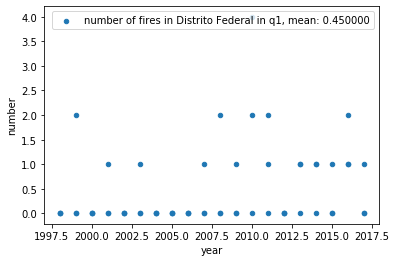

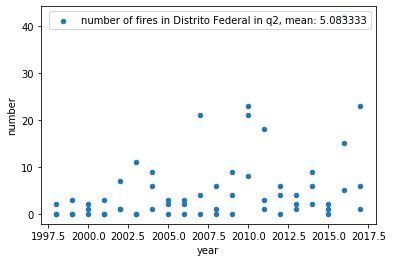

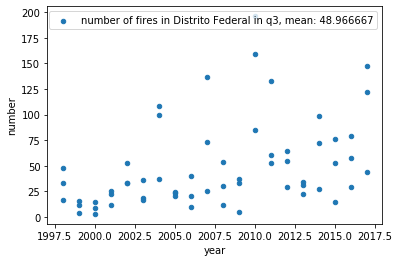

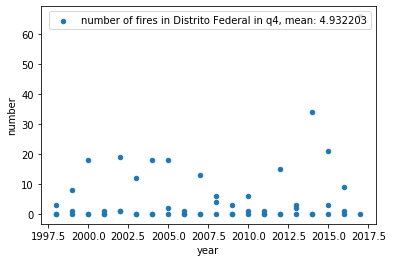

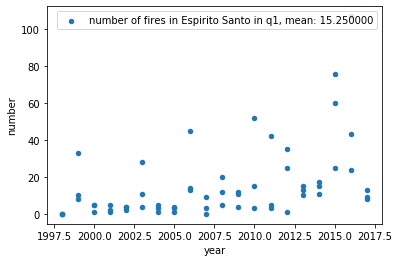

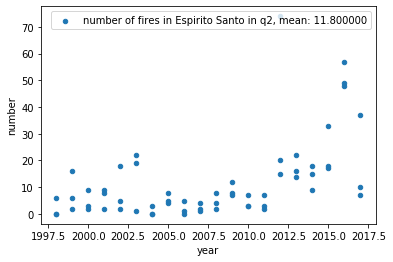

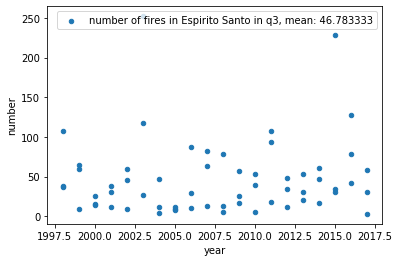

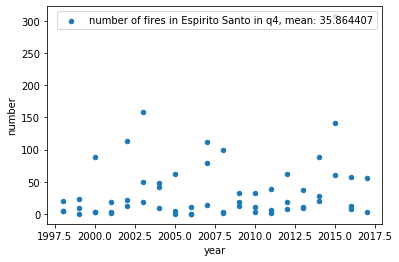

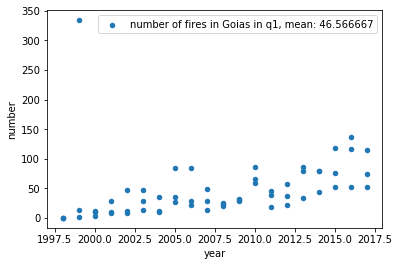

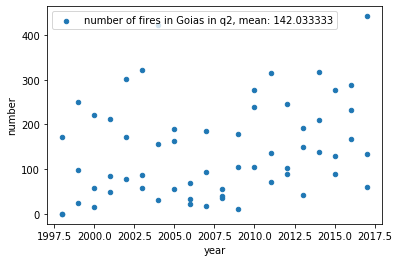

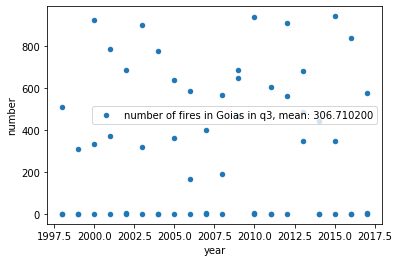

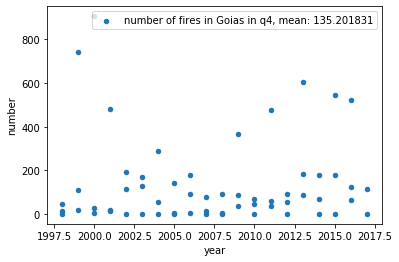

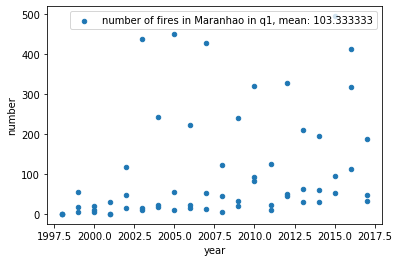

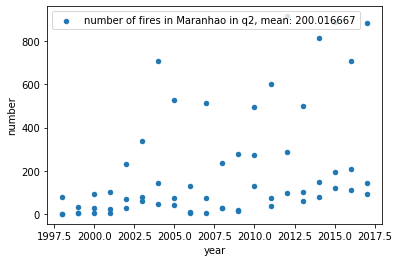

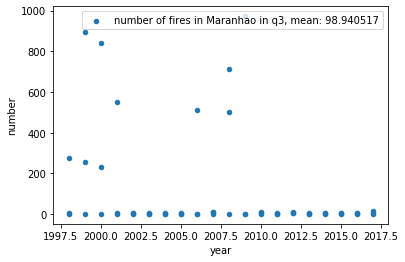

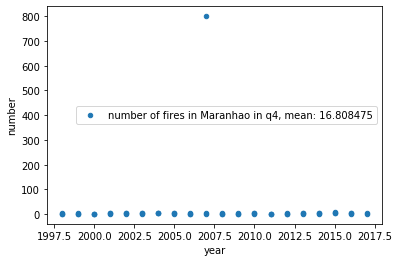

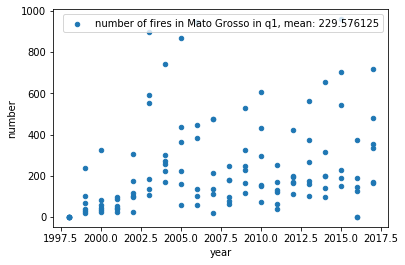

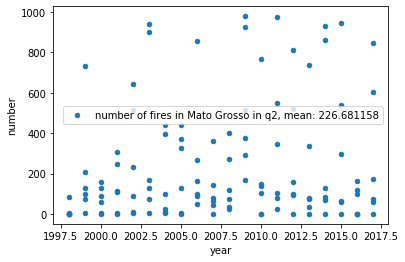

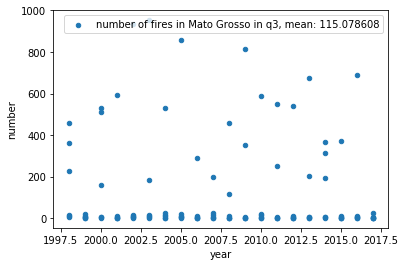

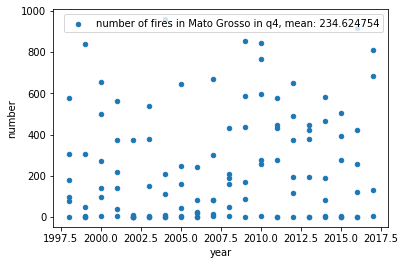

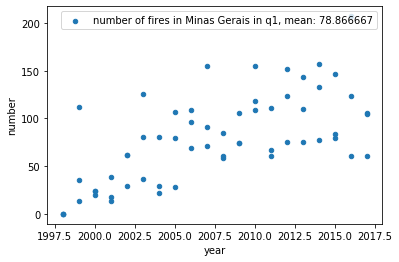

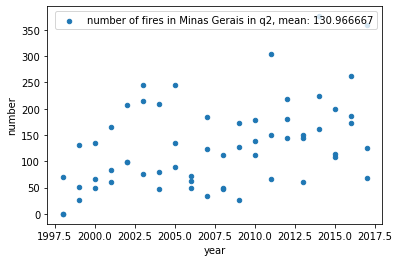

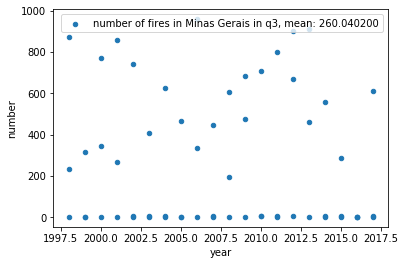

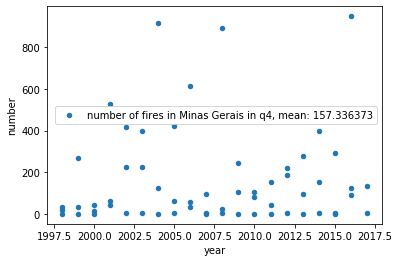

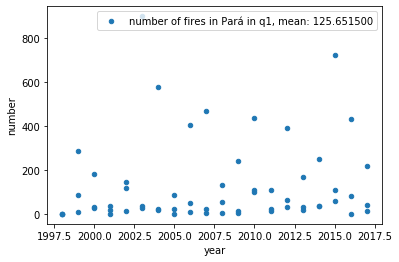

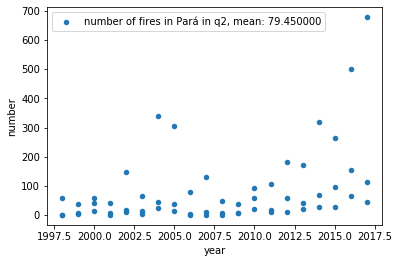

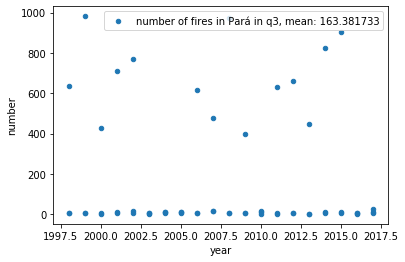

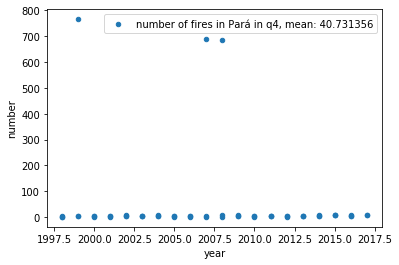

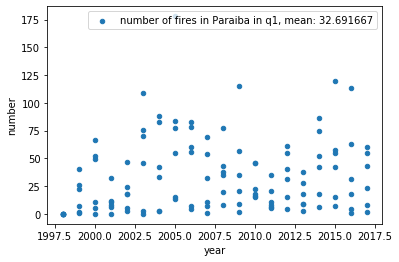

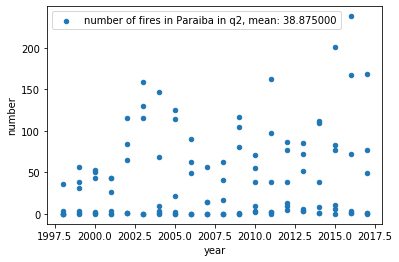

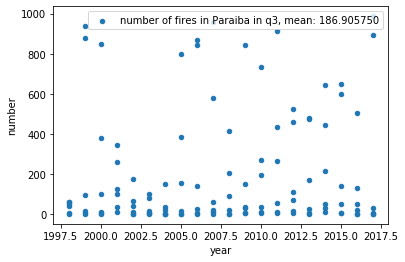

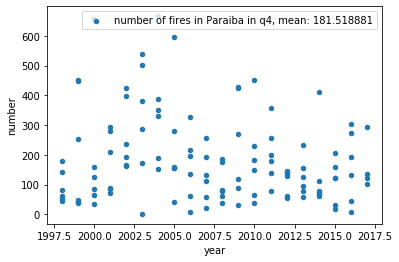

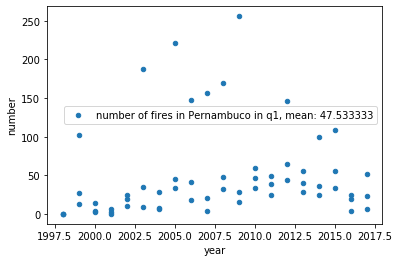

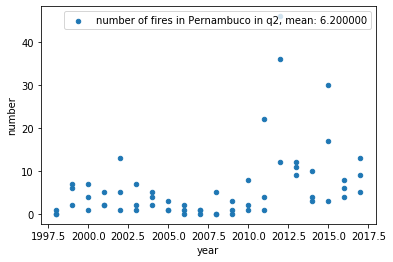

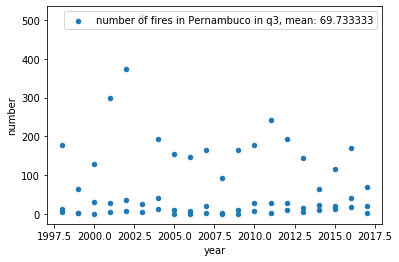

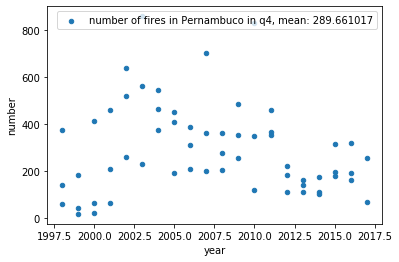

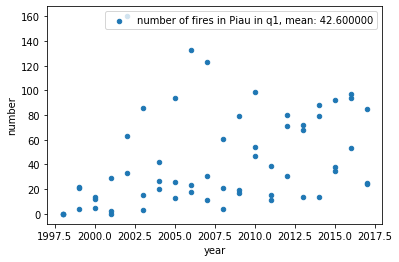

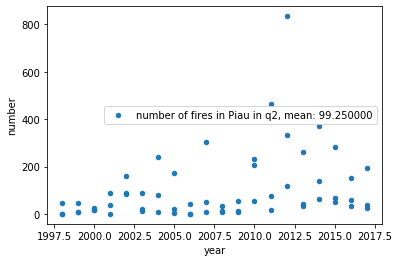

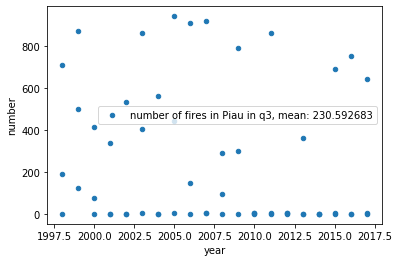

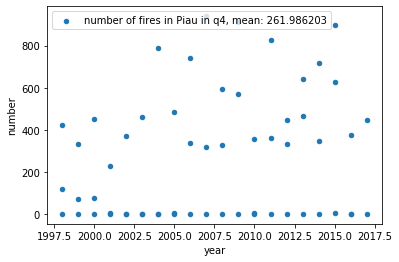

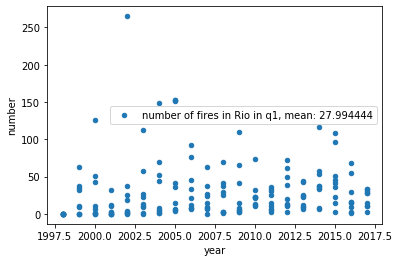

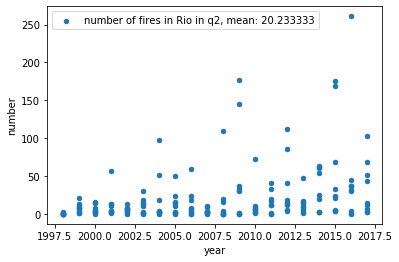

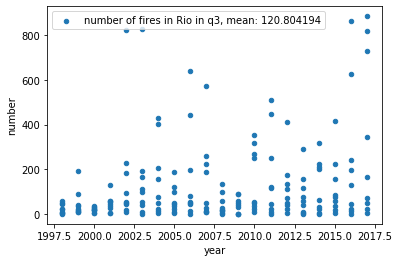

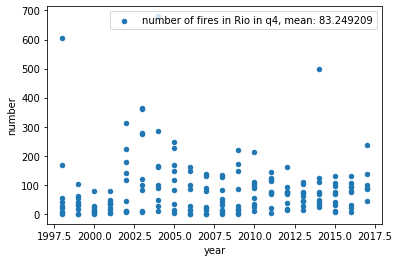

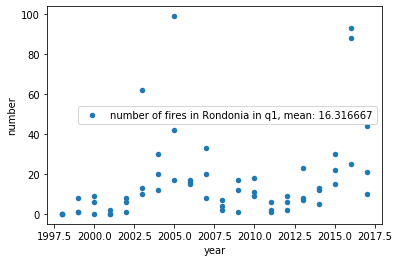

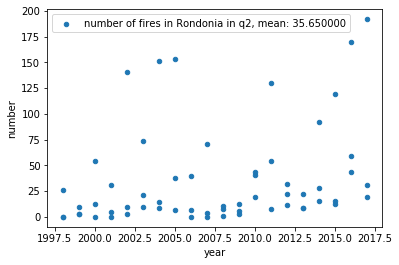

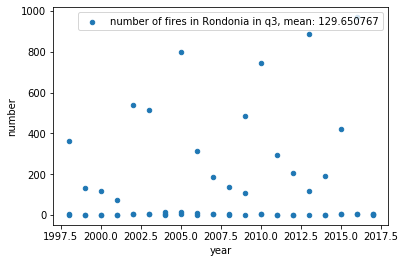

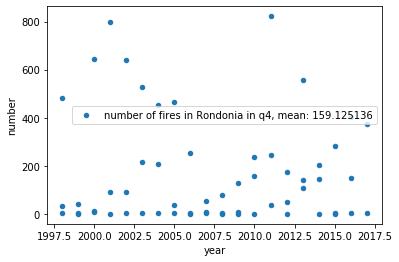

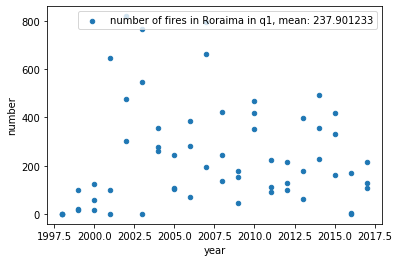

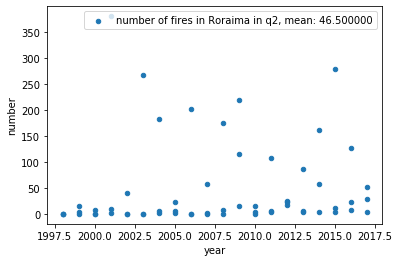

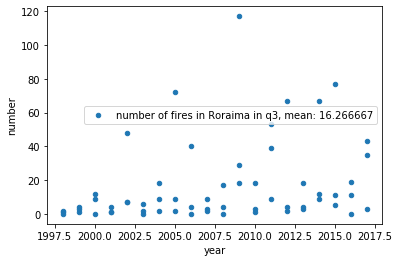

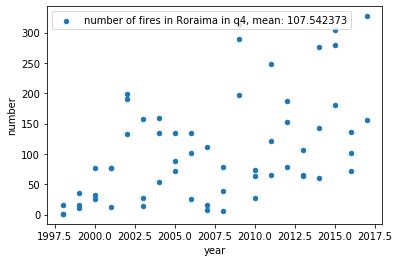

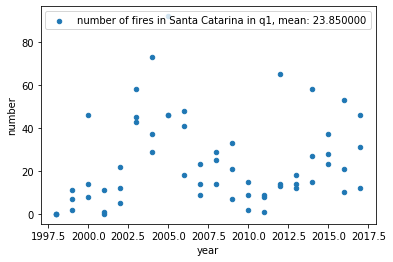

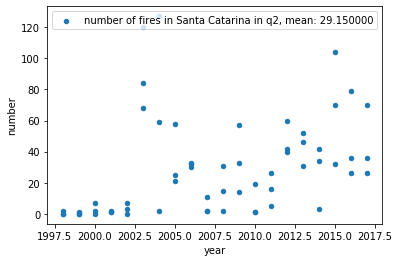

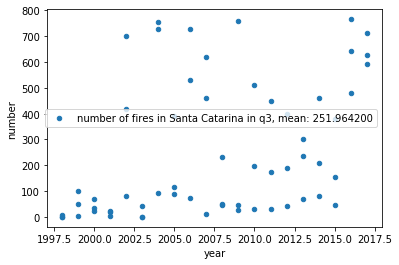

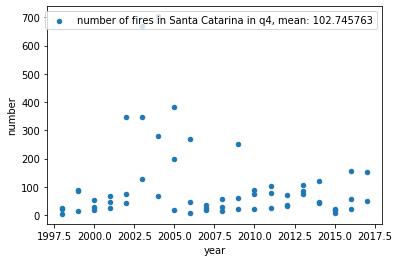

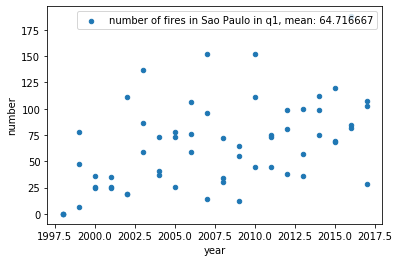

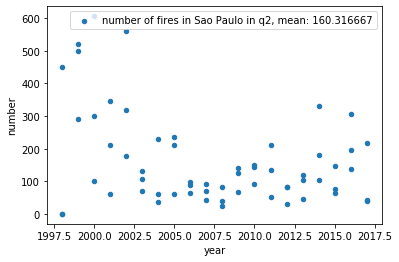

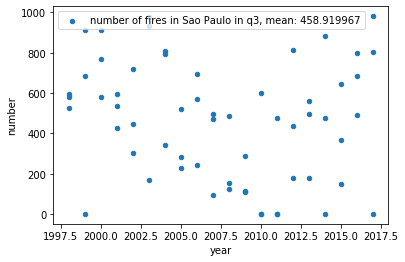

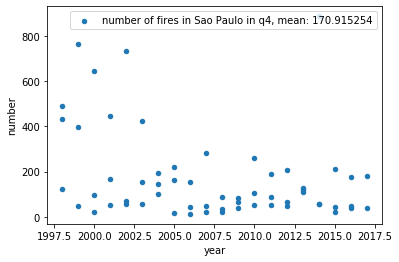

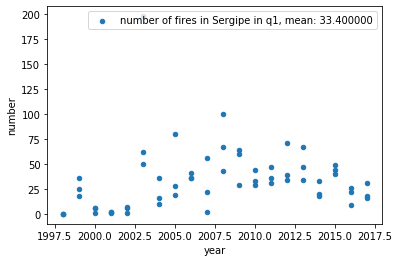

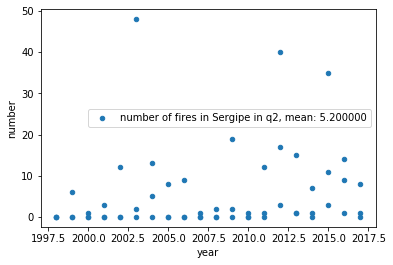

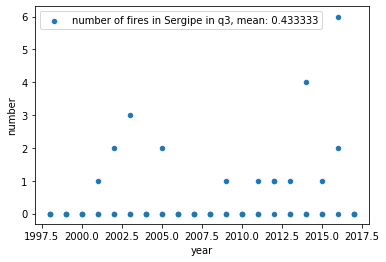

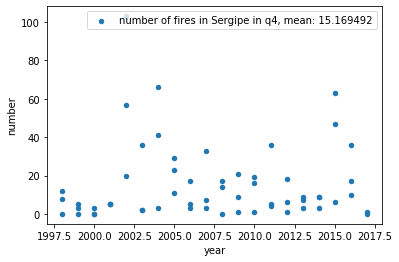

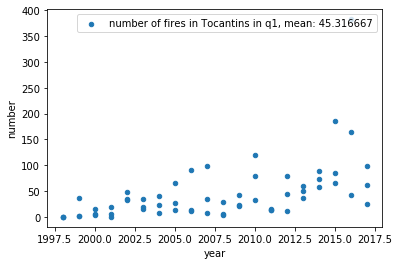

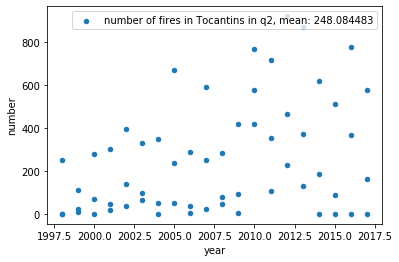

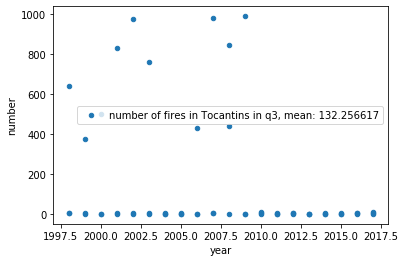

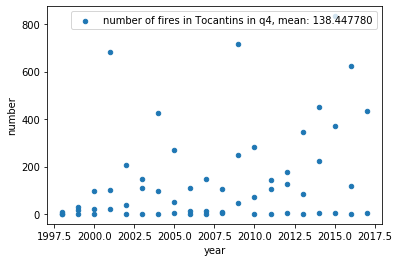

In [26]:
#This creates graphs for the number of fires in each state over the timeframe, sorted by quarters of the year.

for state in states:
    for i in range(0,4):
        q = quarters[i]
        plt.figure()
        df[(df['state'] == state) & q]
        ax = plt.axes()
        filtered_data = df[(df['state'] == state) & q]
        M = filtered_data['number'].mean()
        label='number of fires in %s in q%d, mean: %2f' % (state, i+1, M)
        filtered_data.plot(kind='scatter', ax = ax, x='year', y= 'number',label =label)

mean_by_state = {}
for state in states:
    mean_by_state[state] = df[(df['state'] == state)]['number'].mean()


Having generated and observed these graphs, there is a distinct trend of increase over time as one would expect. However, this can be investigated in closer detail. There are three different areas of analysis which will be focused on.

1. Does the rate of change in fires stay relatively constant over the timeframe, or is there a point of inflection, after which the fires increase notably in frequency? Do the fires ever decrease in frequency?


2. Are there particular months/seasons or states that have seen a greater increase in fires compared to others?


3. The state of Amazonas is unique in that it is large, as well as covered almost entirely by rainforest. This makes it a good measuring stick to compare to the rest of the states. What differences are there, if any exist, between the data for Amazonas and the rest of the dataset as a whole? 

In [17]:
#Breaking down the timeframe into periods of 5 years will make observing changes over time easier
years = df['year'].unique()
y1 = df['year'].isin(years[:4])
y2 = df['year'].isin(years[4:9])
y3 = df['year'].isin(years[9:14])
y4 = df['year'].isin(years[14:19])
years = (y1, y2, y3, y4)

On average, the fires increased in frequency by 23 percent from 1997-2007 to 2008-2017. The median increase was about 18.7%, suggesting that while the mean is realtively close to the center, there are some outlier values that at pulling it away. The two locations that have seen the most drastic increases are the Distrito Federal (91.8%) and Goias (75.0%). Sao Paulo saw the largest reduction (31.4%) which stands out compared to 17.0%, the next highest reduction. Overall, these outliers are enough to slightly skew the mean but not so drastically that it dilutes the effectiveness of the summary statistics. Even with the two highest percentages removed, the trend is that the number of fires increased. 

Roraima is notable for its small size and location within the Amazon. Its data reflects the recent coverage and news regarding the increases in fires. Broken down into periods of 5 years, the data looks like this.

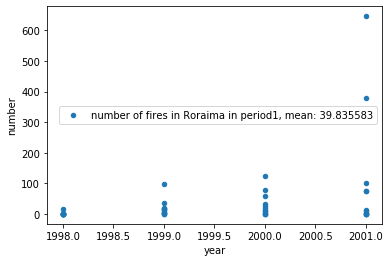

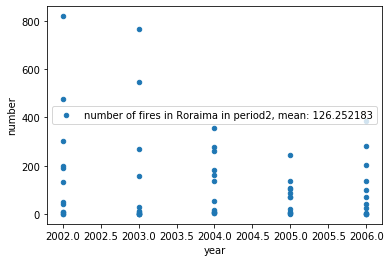

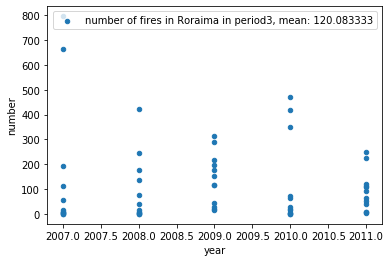

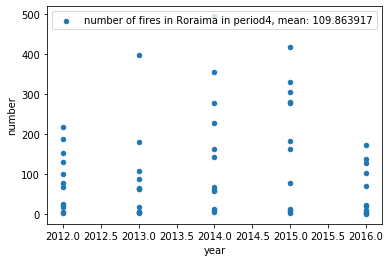

In [21]:
state = 'Roraima'
for i in range(0,4):
    y = years[i]
    plt.figure()
    df[(df['state'] == state) & y]
    ax = plt.axes()
    filtered_data = df[(df['state'] == state) & y]
    M = filtered_data['number'].mean()
    label='number of fires in %s in period%d, mean: %2f' % (state, i+1, M)
    filtered_data.plot(kind='scatter', ax = ax, x='year', y= 'number',label =label)

It seems like by far the largest increase is during the first few years of data collection. The mean number actually decreased from the second period onwards in Roraima. Let's look at another state with wildly different geographical properties, Rio.

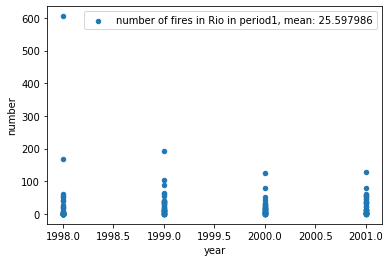

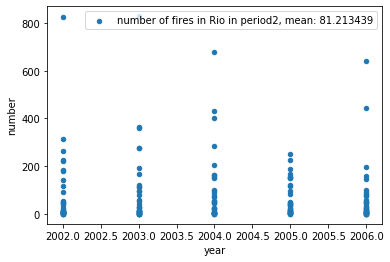

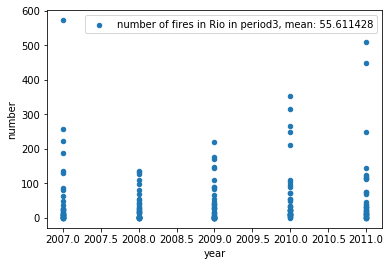

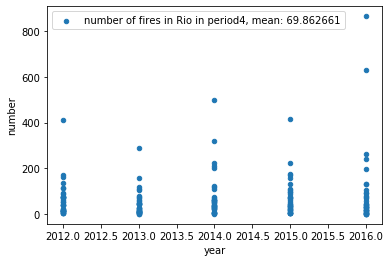

In [27]:
state = 'Rio'
for i in range(0,4):
    y = years[i]
    plt.figure()
    df[(df['state'] == state) & y]
    ax = plt.axes()
    filtered_data = df[(df['state'] == state) & y]
    M = filtered_data['number'].mean()
    label='number of fires in %s in period%d, mean: %2f' % (state, i+1, M)
    filtered_data.plot(kind='scatter', ax = ax, x='year', y= 'number',label =label)

Again, the greatest point of inflection seems to be from the first period to the second period. Let's look at this across all states.

C:\Users\relisoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


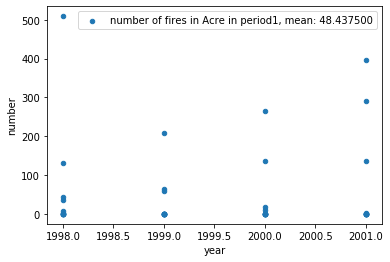

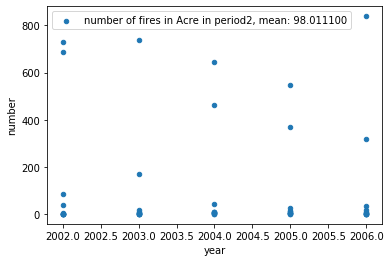

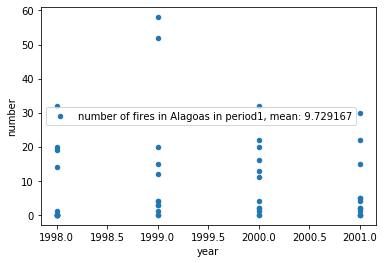

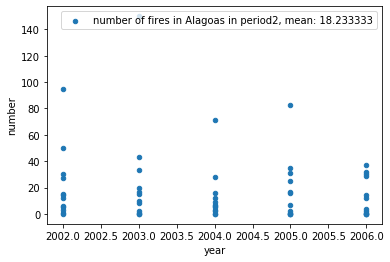

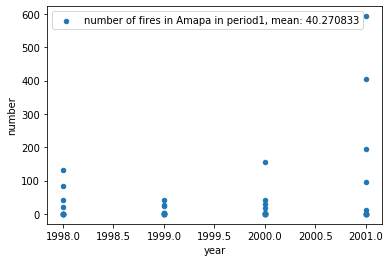

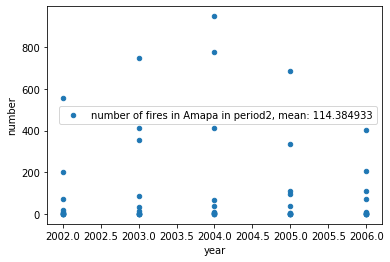

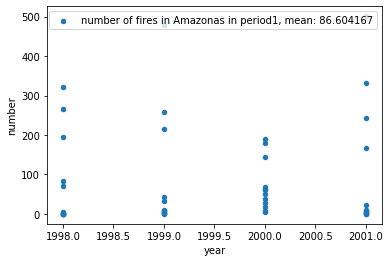

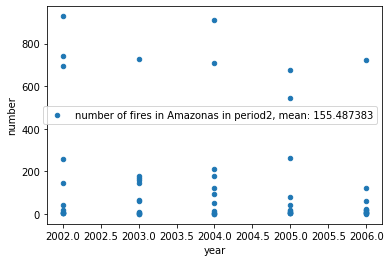

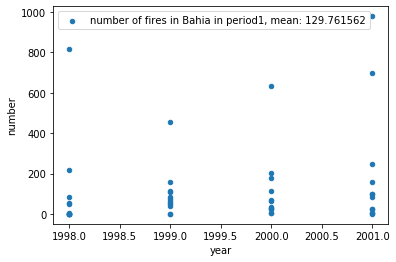

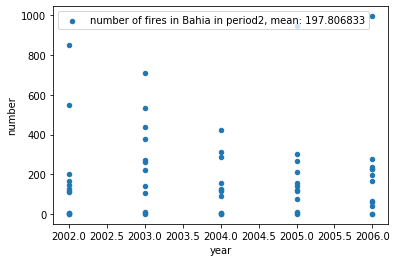

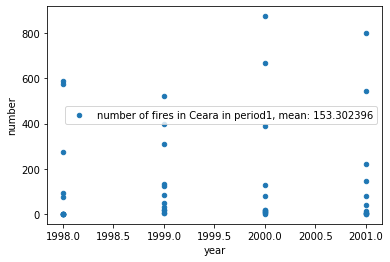

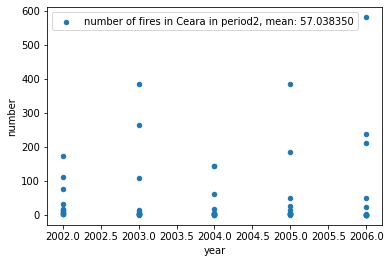

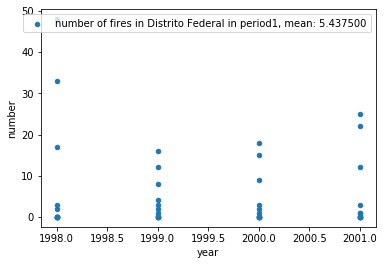

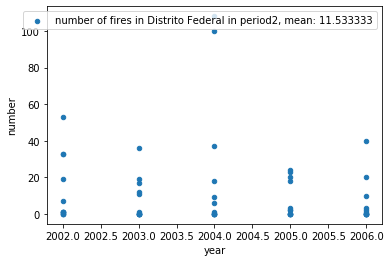

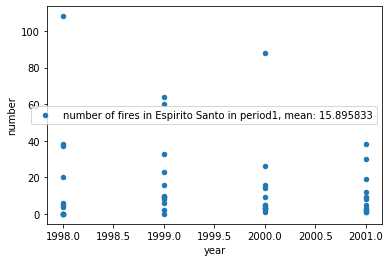

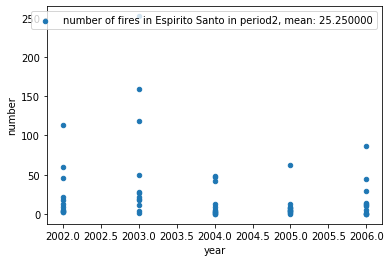

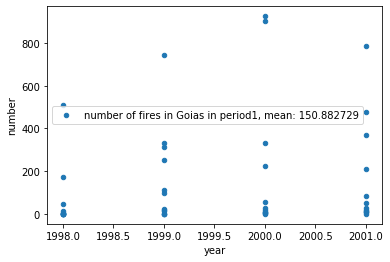

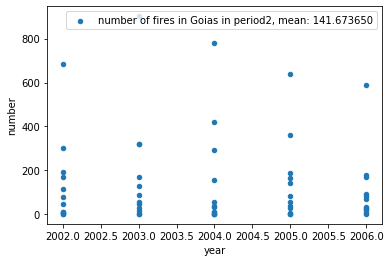

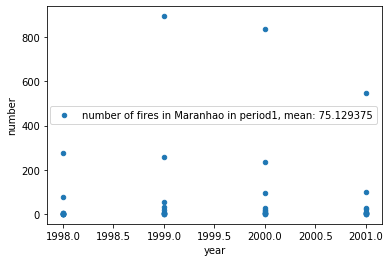

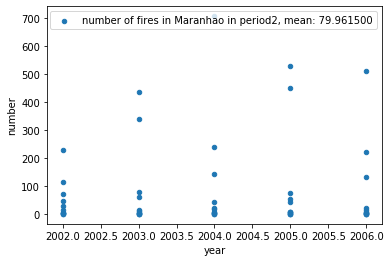

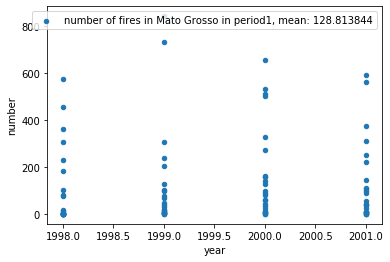

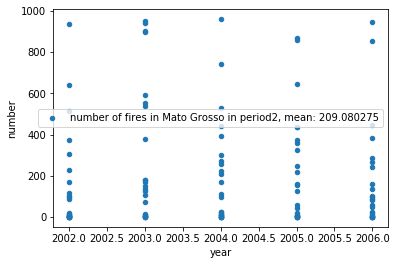

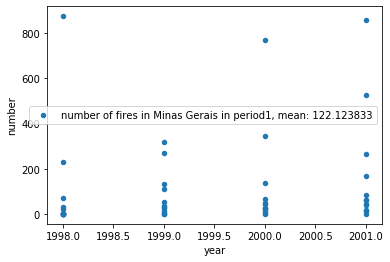

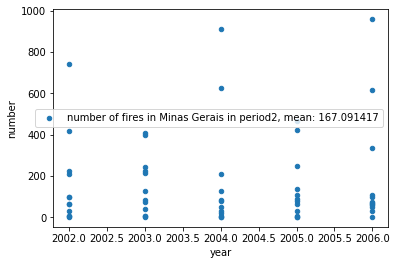

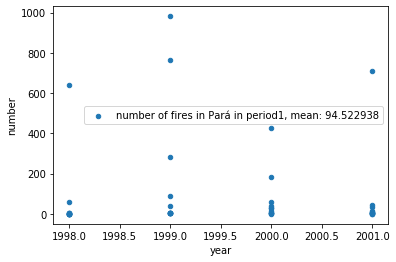

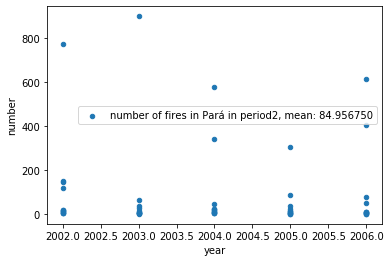

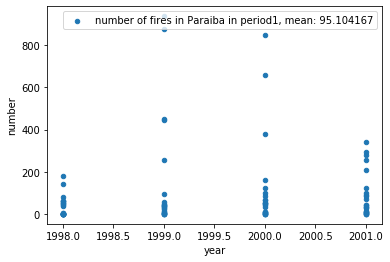

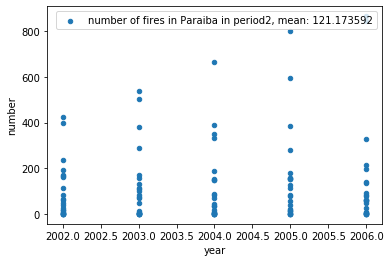

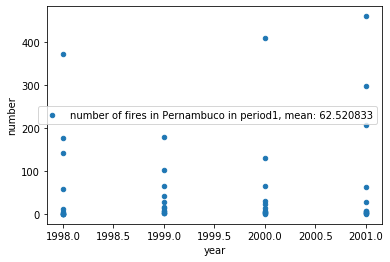

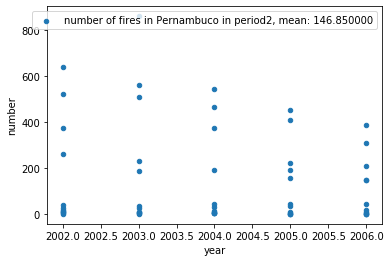

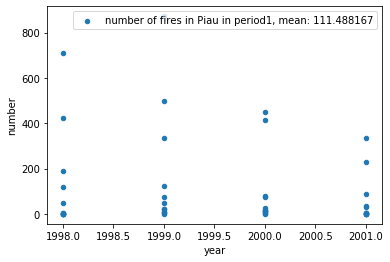

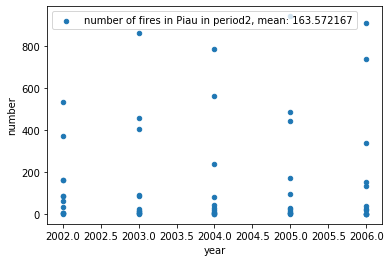

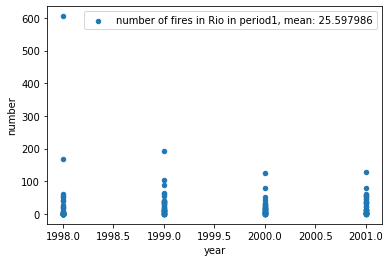

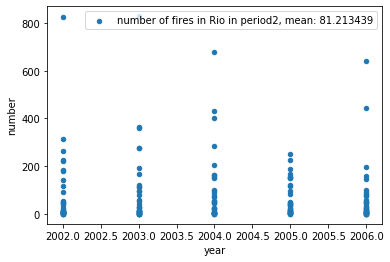

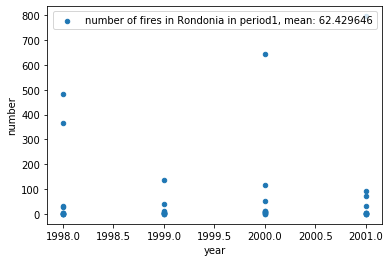

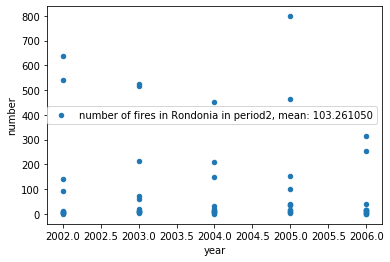

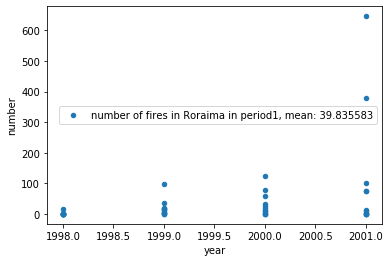

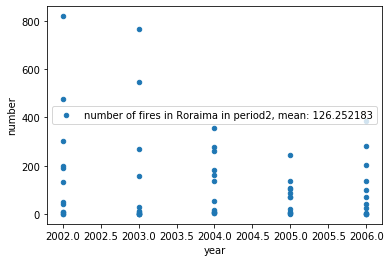

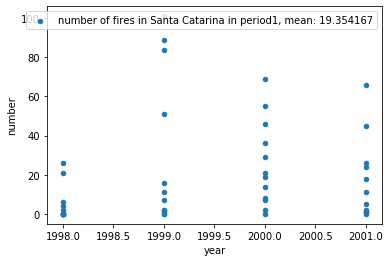

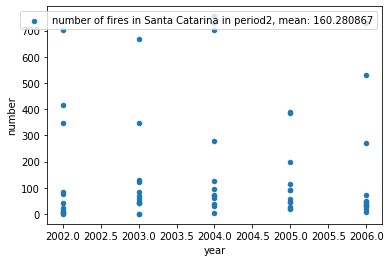

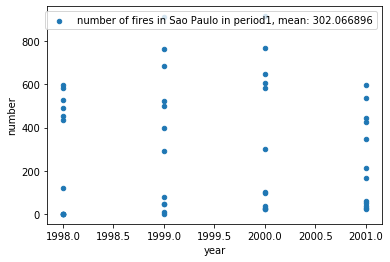

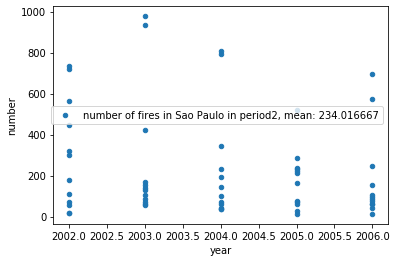

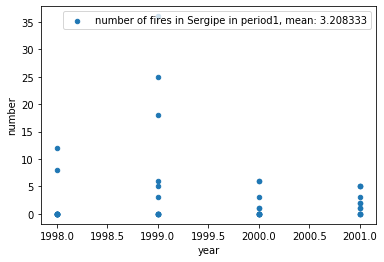

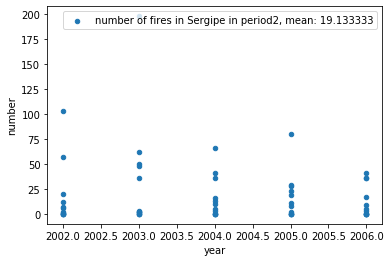

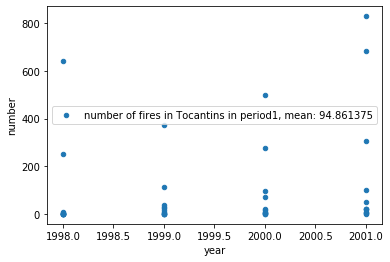

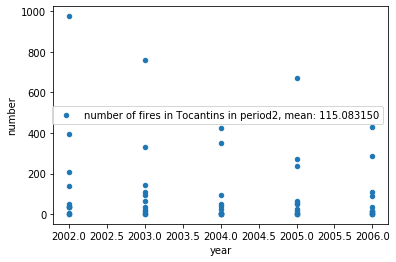

In [28]:
for state in states:
    for i in range(0,2):
        y = years[i]
        plt.figure()
        df[(df['state'] == state) & y]
        ax = plt.axes()
        filtered_data = df[(df['state'] == state) & y]
        M = filtered_data['number'].mean()
        label='number of fires in %s in period%d, mean: %2f' % (state, i+1, M)
        filtered_data.plot(kind='scatter', ax = ax, x='year', y= 'number',label =label)

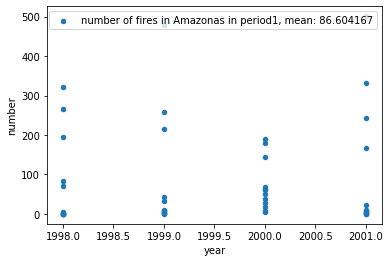

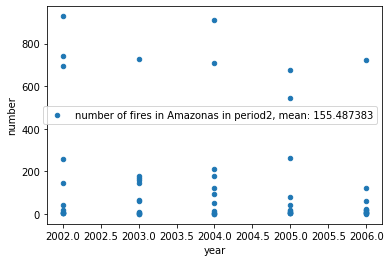

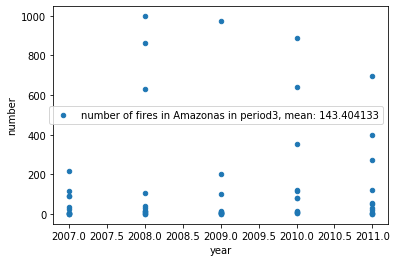

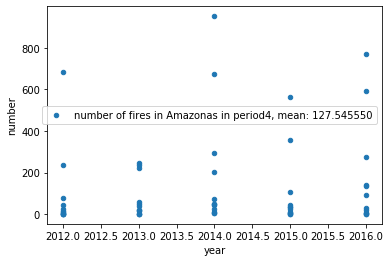

In [24]:
state = 'Amazonas'
for i in range(0,4):
    y = years[i]
    plt.figure()
    df[(df['state'] == state) & y]
    ax = plt.axes()
    filtered_data = df[(df['state'] == state) & y]
    M = filtered_data['number'].mean()
    label='number of fires in %s in period%d, mean: %2f' % (state, i+1, M)
    filtered_data.plot(kind='scatter', ax = ax, x='year', y= 'number',label =label)

Overall, the state of Amazonas is notable for its large number of fires. This is explained due to its massive area. Roraima is another state with high amounts of fires.